<a href="https://colab.research.google.com/github/revachaudhary/Project-3/blob/main/Project_3_AER_850.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

if torch.cuda.is_available():
    print("✅ GPU is available!")
    print("Using device:", torch.cuda.get_device_name(0))
else:
    print("❌ GPU not available. Please check runtime settings.")


✅ GPU is available!
Using device: Tesla T4


In [2]:
!pip install ultralytics torch torchvision torchaudio --quiet


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.7/898.7 kB 15.5 MB/s eta 0:00:00


In [3]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

# Define base path for all files in Google Drive
BASE_PATH = "/content/drive/My Drive/Colab Notebooks/Project 3"

def get_path(file_name):
    return f"{BASE_PATH}/{file_name}"



Mounted at /content/drive


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


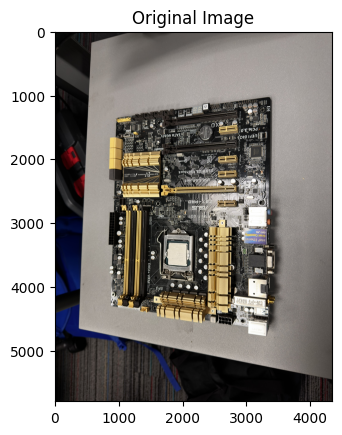

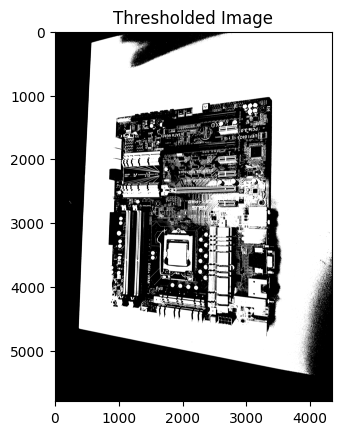

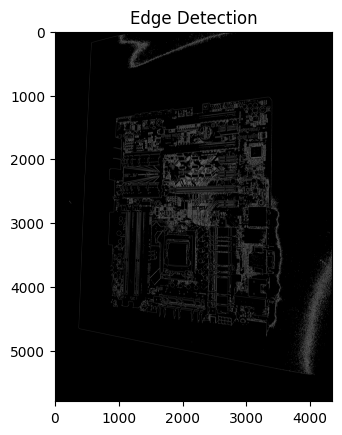

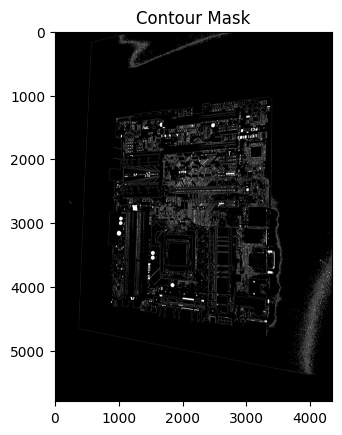

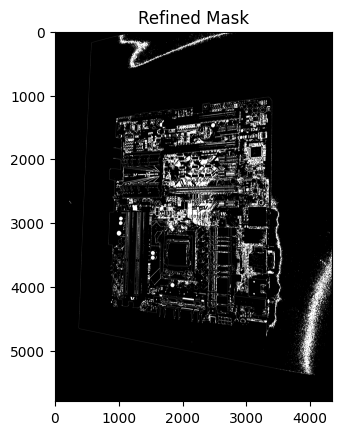

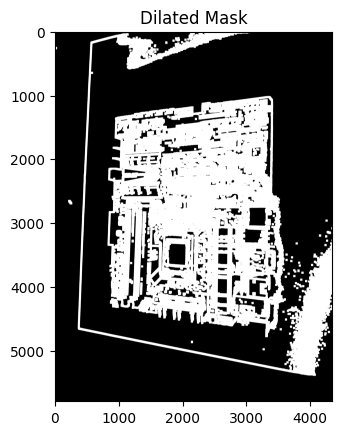

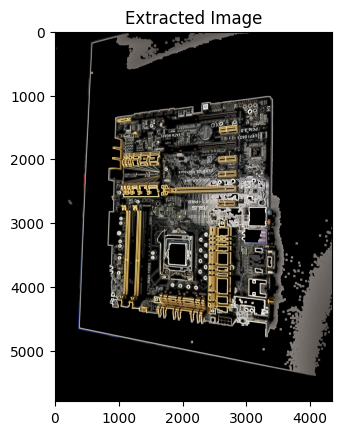

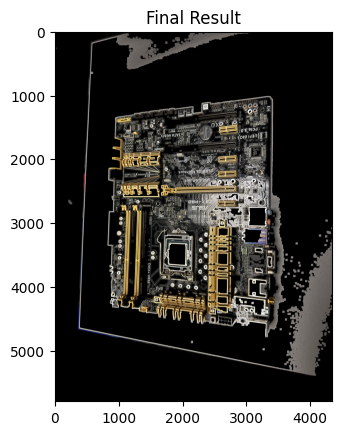

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Mount Google Drive
drive.mount('/content/drive')

# Set up the base path to your project folder
BASE_PATH = "/content/drive/My Drive/Colab Notebooks/Project 3"

def get_path(file_name):
    """Utility function to get the absolute path of a file."""
    return os.path.join(BASE_PATH, file_name)

# Step 1: Load the PCB Image
image_path = get_path("motherboard_image.JPEG")  # Ensure this matches your image name
image = cv2.imread(image_path)



if image is None:
    print("Error loading the image. Check the file path.")
else:
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title("Original Image")
    plt.show()

    # Convert to grayscale and threshold
    _, threshold = cv2.threshold(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY), 100, 255, cv2.THRESH_BINARY)
    plt.imshow(threshold, cmap='gray')
    plt.title("Thresholded Image")
    plt.show()

    # Edge detection
    edges = cv2.Canny(threshold, 100, 200)
    plt.imshow(edges, cmap='gray')
    plt.title("Edge Detection")
    plt.show()

    # Find contours
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    large_contours = [cnt for cnt in contours if cv2.contourArea(cnt) >= 0]

    # Draw contours
    mask = np.zeros_like(edges)
    cv2.drawContours(mask, large_contours, -1, (255), thickness=cv2.FILLED)
    plt.imshow(mask, cmap='gray')
    plt.title("Contour Mask")
    plt.show()

    # Refine mask to remove noise
    kernel = np.ones((5, 5), np.uint8)
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    plt.imshow(mask, cmap='gray')
    plt.title("Refined Mask")
    plt.show()

    mask2 = cv2.dilate(mask, kernel, iterations=8)
    plt.imshow(mask2, cmap='gray')
    plt.title("Dilated Mask")
    plt.show()

    # Extract final image
    extracted = cv2.bitwise_and(image, image, mask=mask2)
    plt.imshow(cv2.cvtColor(extracted, cv2.COLOR_BGR2RGB))
    plt.title("Extracted Image")
    plt.show()

    # Replace background with black
    background = np.zeros_like(image)
    result = np.where(mask2[:, :, None] == 255, extracted, background)
    plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    plt.title("Final Result")
    plt.show()


In [8]:
from ultralytics import YOLO
import os

# Path to dataset configuration file
data_yaml_path = "/content/drive/My Drive/Colab Notebooks/Project 3/data.yaml"

# Verify data.yaml exists
if not os.path.exists(data_yaml_path):
    raise FileNotFoundError(f"Dataset configuration file not found at {data_yaml_path}")

# Load YOLOv8 model
model = YOLO("yolov8n.pt")  # Use YOLOv8 Nano for efficiency

# Train the model and save it in Google Drive
model.train(
    data=data_yaml_path,                               # Path to your data.yaml
    epochs=10,                                         # Number of epochs (lower for testing)
    batch=8,                                           # Lower batch size to manage memory
    imgsz=640,                                         # Smaller image size for efficiency
    name="pcb_model",                                  # Name for the training session
    save_dir="/content/drive/My Drive/Colab Notebooks/Project 3/runs/train"  # Explicit save location
)

print("🎉 Training complete! Weights saved to Google Drive.")


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 6.25M/6.25M [00:00<00:00, 251MB/s]


Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/drive/My Drive/Colab Notebooks/Project 3/data.yaml, epochs=10, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=pcb_model, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_lab

100%|██████████| 755k/755k [00:00<00:00, 129MB/s]


Overriding model.yaml nc=80 with nc=13

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytic

100%|██████████| 5.35M/5.35M [00:00<00:00, 342MB/s]


AMP: checks passed ✅


train: Scanning /content/drive/My Drive/Colab Notebooks/Project 3/train/labels.cache... 544 images, 0 backgrounds, 0 corrupt: 100%|██████████| 544/544 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 108783. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/usr/local/lib/python3.10/dist-packages/albumentations/__init__.py:24: UserWarning: A new version of Albumentations is available: 1.4.22 (you have 1.4.20). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
val: Scanning /content/drive/My Drive/Colab Notebooks/Project 3/valid/labels.cache... 105 images, 0 backgrounds, 0 corrupt: 100%|██████████| 105/105 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 26, len(boxes) = 19108. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to runs/detect/pcb_model/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000588, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/pcb_model
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      4.78G      2.185      4.224      1.242       1109        640: 100%|██████████| 68/68 [00:58<00:00,  1.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:23<00:00,  3.30s/it]

                   all        105      19108      0.742     0.0469     0.0366     0.0183



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      3.99G      2.348      3.214      1.126       1439        640: 100%|██████████| 68/68 [00:27<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.85it/s]

                   all        105      19108      0.841     0.0673     0.0634     0.0336



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      4.09G       2.31      2.791      1.101       1253        640: 100%|██████████| 68/68 [00:24<00:00,  2.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  1.92it/s]

                   all        105      19108      0.705     0.0864     0.0976     0.0558



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      4.22G       2.26      2.517      1.079       1730        640: 100%|██████████| 68/68 [00:26<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.15it/s]

                   all        105      19108      0.615      0.114      0.112     0.0627



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10      4.33G      2.202       2.32      1.059       1484        640: 100%|██████████| 68/68 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.26it/s]

                   all        105      19108      0.553      0.121      0.153     0.0913



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10      4.92G      2.136      2.212      1.044       1225        640: 100%|██████████| 68/68 [00:24<00:00,  2.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.14it/s]

                   all        105      19108      0.371       0.14      0.152     0.0916



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      4.21G       2.13      2.133      1.045       1294        640: 100%|██████████| 68/68 [00:27<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.29it/s]

                   all        105      19108      0.375      0.175      0.167      0.102



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10       2.5G      2.117      2.056      1.033       1282        640: 100%|██████████| 68/68 [00:23<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:04<00:00,  1.71it/s]

                   all        105      19108      0.423      0.191      0.177      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      3.46G      2.085      2.015       1.03       1311        640: 100%|██████████| 68/68 [00:27<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:03<00:00,  2.07it/s]

                   all        105      19108      0.512      0.186       0.18      0.109



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      4.81G      2.058       1.97      1.022        775        640: 100%|██████████| 68/68 [00:24<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:05<00:00,  1.24it/s]

                   all        105      19108      0.497      0.195      0.185      0.115



10 epochs completed in 0.103 hours.
Optimizer stripped from runs/detect/pcb_model/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/pcb_model/weights/best.pt, 6.2MB

Validating runs/detect/pcb_model/weights/best.pt...
Ultralytics 8.3.49 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 3,008,183 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 7/7 [00:15<00:00,  2.19s/it]


                   all        105      19108      0.498      0.195      0.185      0.115
                Button         14         45      0.425     0.0499     0.0836     0.0739
             Capacitor        104       7251       0.32      0.186      0.189      0.083
             Connector         76        659      0.317      0.639      0.485      0.302
                 Diode         11         53          0          0          0          0
Electrolytic Capacitor         15        160      0.646      0.369      0.457      0.278
                    IC         95       1322      0.439      0.804      0.693      0.413
              Inductor         12         45          1          0          0          0
                   Led         18        127          1          0          0          0
                  Pads         20        143          1          0          0          0
                  Pins         10        151      0.238      0.146      0.117     0.0513
              Resisto

In [9]:
import shutil

# Copy 'runs' folder to your Project 3 directory in Google Drive
shutil.copytree("/content/runs", "/content/drive/My Drive/Colab Notebooks/Project 3/runs")

print("✅ Results successfully copied to Google Drive under 'Project 3/runs'.")


✅ Results successfully copied to Google Drive under 'Project 3/runs'.


In [12]:
# Path to the trained model weights
model_path = "/content/runs/detect/pcb_model/weights/best.pt"

# Check if trained model exists
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Trained model not found at {model_path}")

# Load the trained model
model = YOLO(model_path)

# Path to evaluation images
evaluation_path = get_path("evaluation")  # Ensure this folder exists and contains test images

# Perform Inference
results = model.predict(source=evaluation_path, save=True)

print("✅ Evaluation complete! Results saved in 'runs/predict'.")



image 1/3 /content/drive/My Drive/Colab Notebooks/Project 3/evaluation/ardmega.jpg: 576x640 4 Capacitors, 6 Connectors, 8 ICs, 2 Resistors, 40.7ms
image 2/3 /content/drive/My Drive/Colab Notebooks/Project 3/evaluation/arduno.jpg: 448x640 9 Capacitors, 8 Connectors, 1 Electrolytic Capacitor, 3 ICs, 60.4ms
image 3/3 /content/drive/My Drive/Colab Notebooks/Project 3/evaluation/rasppi.jpg: 448x640 3 Capacitors, 7 Connectors, 2 Electrolytic Capacitors, 11 ICs, 11.9ms
Speed: 4.4ms preprocess, 37.7ms inference, 1.9ms postprocess per image at shape (1, 3, 448, 640)
Results saved to runs/detect/predict
✅ Evaluation complete! Results saved in 'runs/predict'.



image 1/3 /content/drive/My Drive/Colab Notebooks/Project 3/evaluation/ardmega.jpg: 576x640 4 Capacitors, 6 Connectors, 8 ICs, 2 Resistors, 9.3ms
image 2/3 /content/drive/My Drive/Colab Notebooks/Project 3/evaluation/arduno.jpg: 448x640 9 Capacitors, 8 Connectors, 1 Electrolytic Capacitor, 3 ICs, 7.5ms
image 3/3 /content/drive/My Drive/Colab Notebooks/Project 3/evaluation/rasppi.jpg: 448x640 3 Capacitors, 7 Connectors, 2 Electrolytic Capacitors, 11 ICs, 7.0ms
Speed: 3.0ms preprocess, 7.9ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/runs/predict_fixed
✅ Inference complete! Results saved in '/content/runs/predict_fixed'.
📂 Found 3 images in /content/runs/predict_fixed. Displaying results:


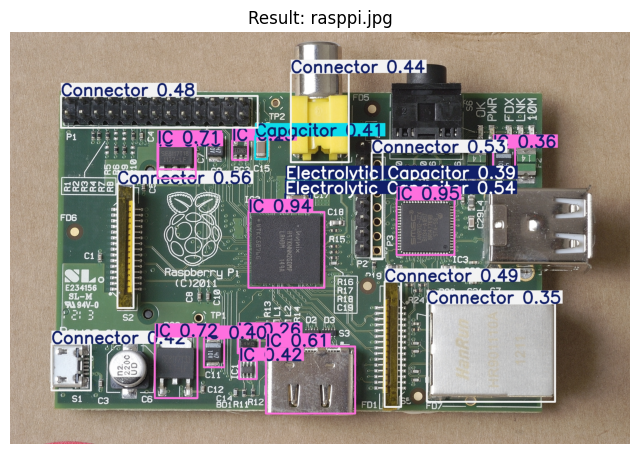

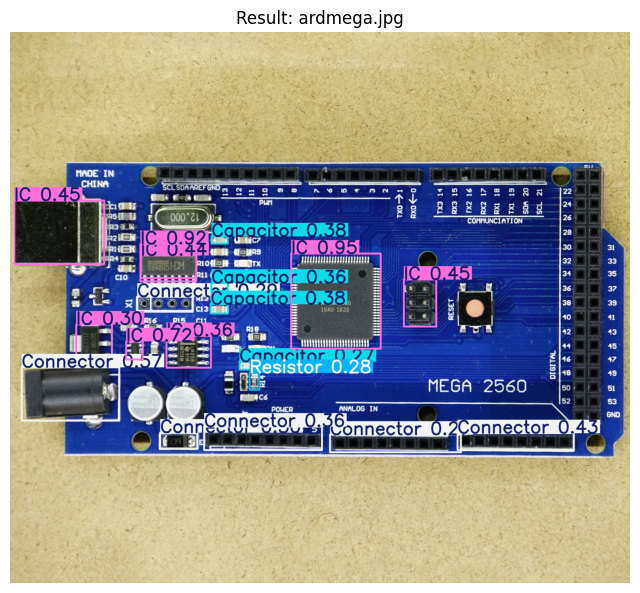

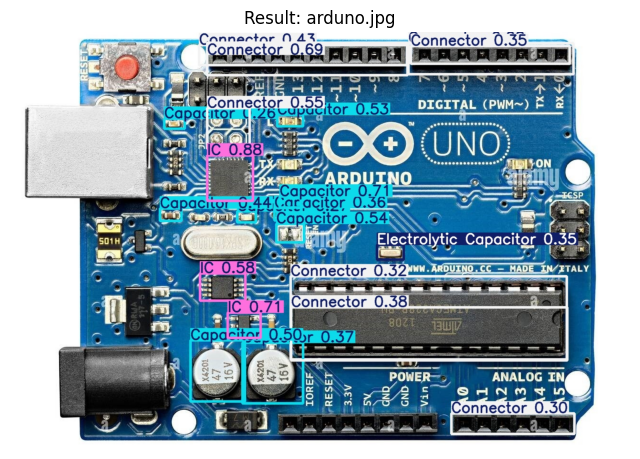

In [13]:
from ultralytics import YOLO
import os
import cv2
import matplotlib.pyplot as plt

# Path to the trained weights
model_path = "/content/runs/detect/pcb_model/weights/best.pt"

# Verify if weights exist
if not os.path.exists(model_path):
    raise FileNotFoundError(f"Trained model not found at {model_path}")

# Load the trained model
model = YOLO(model_path)

# Path to evaluation images
evaluation_path = "/content/drive/My Drive/Colab Notebooks/Project 3/evaluation"

# Explicitly specify save directory for inference results
results = model.predict(source=evaluation_path, save=True, project="/content/runs", name="predict_fixed")

print("✅ Inference complete! Results saved in '/content/runs/predict_fixed'.")

# Display results inline
results_folder = "/content/runs/predict_fixed"

if os.path.exists(results_folder):
    images = [f for f in os.listdir(results_folder) if f.endswith(('.jpg', '.png', '.jpeg'))]
    print(f"📂 Found {len(images)} images in {results_folder}. Displaying results:")

    for img_file in images:
        img_path = os.path.join(results_folder, img_file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(8, 8))
        plt.imshow(img)
        plt.title(f"Result: {img_file}")
        plt.axis("off")
        plt.show()
else:
    print("❌ Results folder still not found. Please check for errors during inference.")